<a href="https://colab.research.google.com/github/eashabibi/FML/blob/main/Ridge_Regression_(OR)_L2_On_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
startups=pd.read_csv('/content/drive/MyDrive/FML/50_Startups.csv')

In [3]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: >

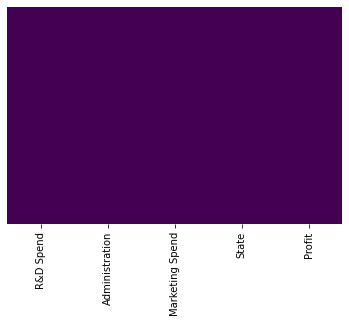

In [5]:
sns.heatmap(startups.isnull(),cbar=False,yticklabels=False,cmap="viridis")

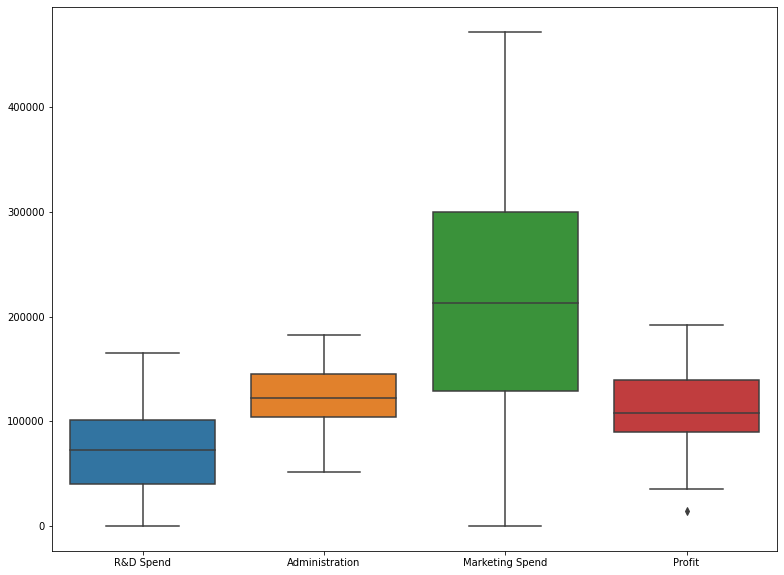

In [6]:
# boxplot
# To increase figure size
plt.figure(figsize=(13,10))
sns.boxplot(startups) 
plt.show()

In [7]:
# finding quartiles q1 and q3 using "quantile" function 
# inter quartile range=q3-q1
q1=startups["Profit"].quantile(0.25)
q3=startups["Profit"].quantile(0.75)
inqr=q3-q1
print(inqr)

49627.07499999998


In [8]:
# After finding inter quartile range , finding upper limit and lower limit of profit coloumn
up_lim=q3+1.5*inqr
low_lim=q1-1.5*inqr
print(up_lim,low_lim)



214206.58999999997 15698.290000000023


In [9]:
# values Above the upper limit and below lower limit are OUTLIERS
outliers=[]
profit=startups["Profit"]
for i in profit:
  if(i>up_lim or i<low_lim):
      outliers.append(i)
print(outliers)
# at 14681.4  the outlier point is obtained, it is inserted into actual profit coloumn data
# Using measures of central of tendency either mean (or) median (or) mode


[14681.4]


In [10]:
# repalcing outliers with mean value 
# updating profit column
startups["Profit"]=startups["Profit"].replace(outliers,startups["Profit"].mean())

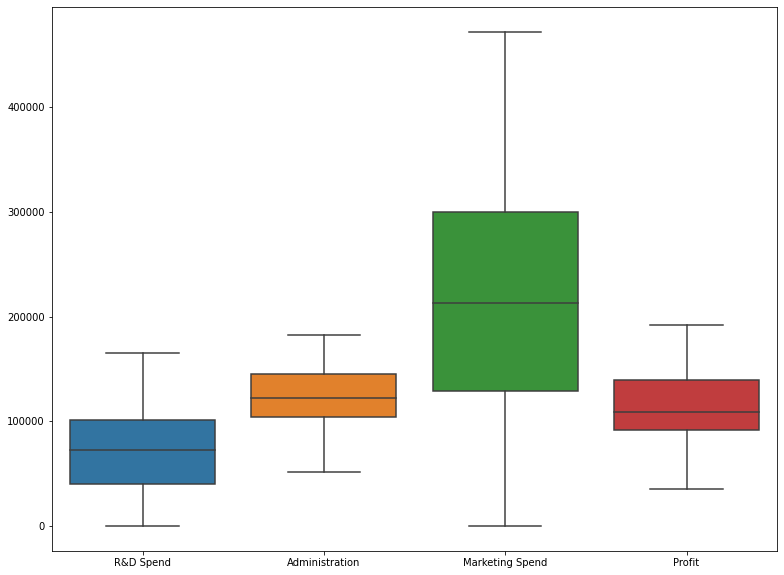

In [11]:
# displaying dataset by removing outliers
plt.figure(figsize=(13,10))
sns.boxplot(startups) 
plt.show()

In [12]:
# To find correlation between columns
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.953493
Administration,0.241955,1.000000,-0.032154,0.205950
Marketing Spend,0.724248,-0.032154,1.000000,0.726445
Profit,0.953493,0.205950,0.726445,1.000000


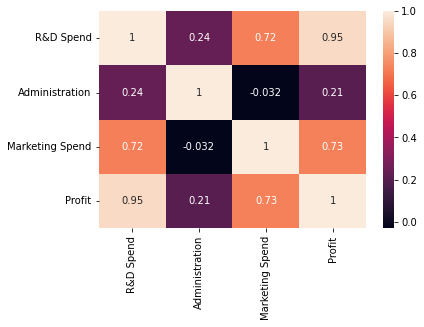

In [13]:
# TO visualize clearly in heatmap 
sns.heatmap(startups.corr(),annot=True)
plt.show()

In [14]:
# To convert from dataframe to numpy array ".value" is used.
# Input coloumns are taken except profit column so drop profit.
# X is not converted into numpy arrays needs modify using pandas for state coloumn( which is in strings).
X=startups.drop("Profit",axis=1)
y=startups['Profit'].values

In [15]:
X.shape,y.shape
# data is in array of 50 elements.

((50, 4), (50,))

In [16]:
# changing y into 2D
y=y.reshape(-1,1)
y.shape

(50, 1)

In [17]:
X.shape,y.shape

((50, 4), (50, 1))

In [18]:
startups.info()
# State coloumn is in strings needs to convert into 0's and 1's

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [19]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [20]:
# To convert state coloumn it is kept in another dummy stae of data.
dummy=pd.get_dummies(startups["State"])
dummy.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [21]:
# State coloumn dropped 
X=X.drop('State',axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [22]:
# newly converted state coloumn is inserted into data.
X=pd.concat([X,dummy],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [23]:
# splitting data for training and testing.
from sklearn.model_selection  import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)

In [24]:
# importing Ridge method
# alpha is learning rate given by engineering programmers.
# alpha value is too small as it moves slowly step by step .
from sklearn.linear_model import Ridge
reg=Ridge(alpha=0.1)

In [25]:
# For training "fit" method is used
reg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [26]:
# For predicting errors for training error 
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_predict=reg.predict(X_train)
mae=mean_absolute_error(y_train,y_predict) 
mse=mean_squared_error(y_train,y_predict)
rmse=np.sqrt(mean_squared_error(y_train,y_predict))
rs=r2_score(y_train,y_predict)
print("mae ",mae)
print("mse ",mse)
print("rmse ",rmse)
print("rs ",rs) 
# r2 score always lies between 0 to 1

mae  7473.75728744787
mse  125014260.5270361
rmse  11180.977619467632
rs  0.9142683569950547


In [27]:
# Testing data (which is unseen data by model)
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_predict_test=reg.predict(X_test)
mae=mean_absolute_error(y_test,y_predict_test)
mse=mean_squared_error(y_test,y_predict_test)
rmse=np.sqrt(mean_squared_error(y_test,y_predict_test))
rs=r2_score(y_test,y_predict_test)
print("mae ",mae)
print("mse ",mse)
print("rmse ",rmse)
print("rs ",rs)
# r2 score always lies between 0 to 1

mae  6021.121948595961
mse  61793194.011823274
rmse  7860.864711456576
rs  0.9092733701889577
